Задание 11.3

В ходе обработки аудиозаписи барабанной партии перед этапом дискретизации была выполнена антиалиасинговая фильтрация. Затем, после снижения частоты выборки (децимации), для устранения артефактов, таких как спектральные образы, был применен низкочастотный фильтр. Сопоставление спектральных характеристик первоначального сигнала (после антиалиасинговой фильтрации) и сигнала, восстановленного после процедур децимации и интерполяции, выявило их значительное подобие. Максимальное расхождение амплитуд в спектрах достигло всего 3.3422e-16, что свидетельствует о практически идеальном совпадении сигналов при корректном использовании антиалиасинговой обработки и последующей фильтрации спектральных отражений.

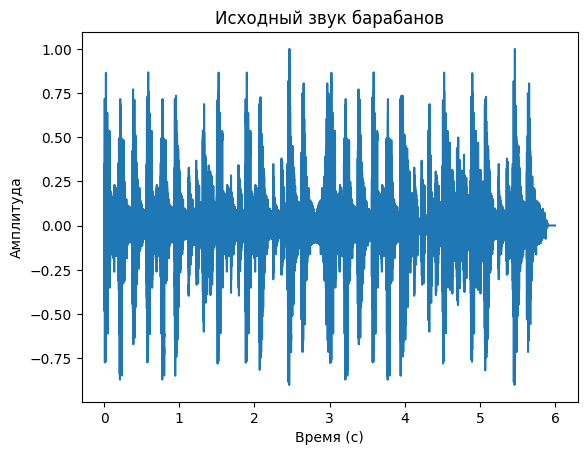

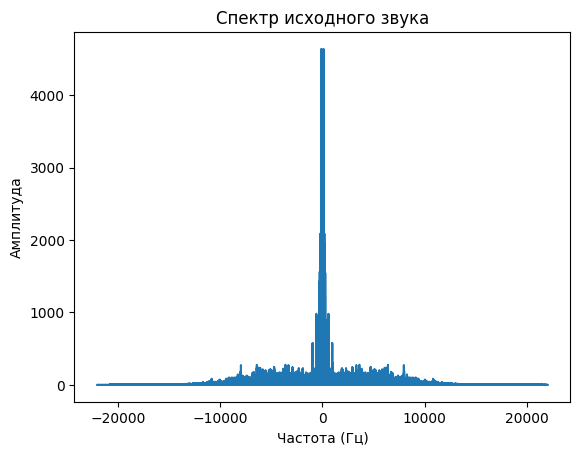

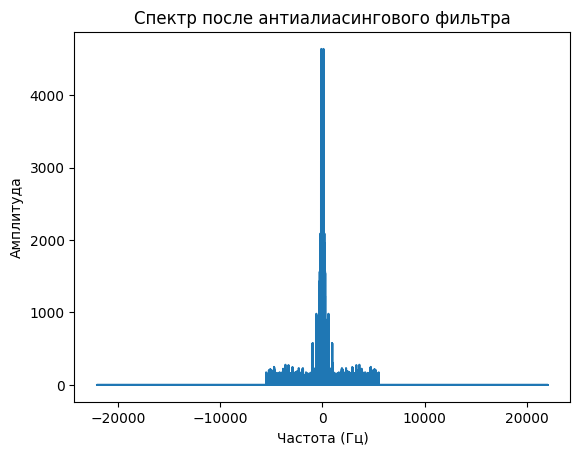

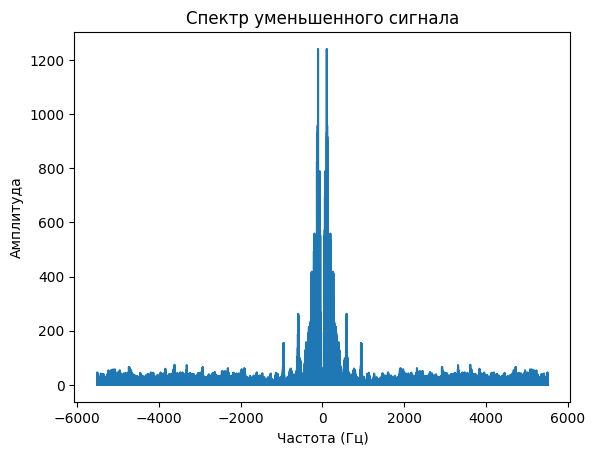

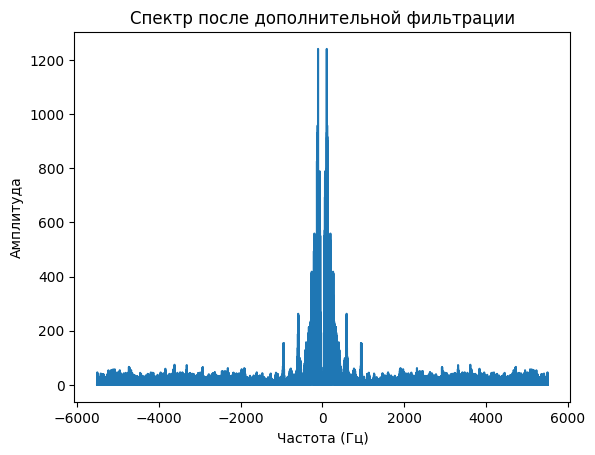

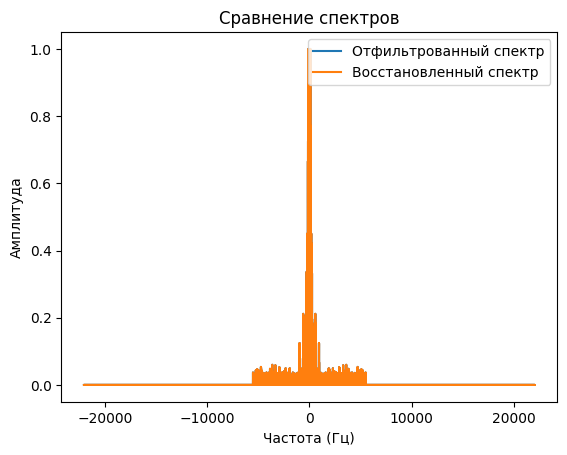

Размер drum_freq: 264600, Размер restored_freq: 264600
Частота дискретизации drum_freq: 44100, restored_freq: 44100
Максимальная разница между спектрами: 4.742874840267547e-16


D:\ThinkDSP\venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\ThinkDSP\venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


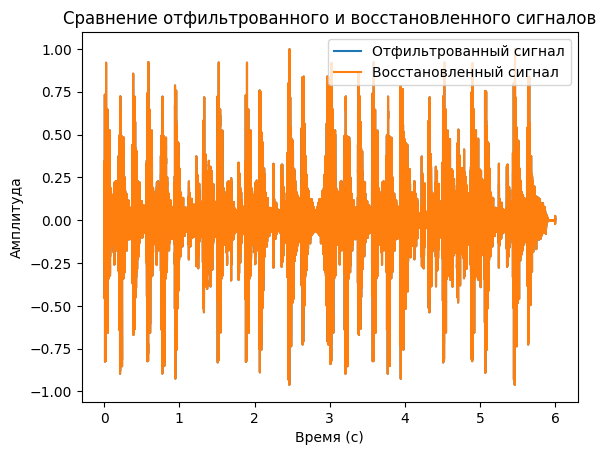

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Wave, read_wave
from scipy import signal

def reduce_sampling(waveform, ratio):
    new_size = len(waveform) // ratio
    reduced_data = waveform.ys[::ratio][:new_size]
    new_rate = waveform.framerate // ratio
    return Wave(reduced_data, framerate=new_rate)

def increase_sampling(waveform, target_rate):
    current_rate = waveform.framerate
    sample_count = int(len(waveform.ys) * target_rate / current_rate)
    upsampled_data = signal.resample(waveform.ys, sample_count)
    return Wave(upsampled_data, framerate=target_rate)

drum_audio = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
drum_audio.normalize()
plt.plot(drum_audio.ts, drum_audio.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный звук барабанов')
plt.show()

drum_freq = drum_audio.make_spectrum(full=True)
plt.plot(drum_freq.fs, drum_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного звука')
plt.show()

reduction_factor = 4
new_rate_value = drum_audio.framerate // reduction_factor
cutoff_threshold = new_rate_value / 2 - 2
drum_freq.low_pass(cutoff_threshold)
plt.plot(drum_freq.fs, drum_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр после антиалиасингового фильтра')
plt.show()

filtered_audio = drum_freq.make_wave()
filtered_audio.normalize()
reduced_audio = reduce_sampling(filtered_audio, reduction_factor)
reduced_audio.normalize()
reduced_freq = reduced_audio.make_spectrum(full=True)
plt.plot(reduced_freq.fs, reduced_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр уменьшенного сигнала')
plt.show()

reduced_freq.low_pass(cutoff_threshold)
plt.plot(reduced_freq.fs, reduced_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр после дополнительной фильтрации')
plt.show()

restored_audio = increase_sampling(reduced_audio, drum_audio.framerate)
restored_freq = restored_audio.make_spectrum(full=True)
drum_max = np.max(np.abs(drum_freq.hs))
restored_max = np.max(np.abs(restored_freq.hs))
if drum_max != 0 and restored_max != 0:
    drum_freq.hs = drum_freq.hs / drum_max
    restored_freq.hs = restored_freq.hs / restored_max
plt.plot(drum_freq.fs, drum_freq.amps, label='Отфильтрованный спектр')
plt.plot(restored_freq.fs, restored_freq.amps, label='Восстановленный спектр')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров')
plt.legend()
plt.show()
print(f"Размер drum_freq: {len(drum_freq.hs)}, Размер restored_freq: {len(restored_freq.hs)}")
print(f"Частота дискретизации drum_freq: {drum_freq.framerate}, restored_freq: {restored_freq.framerate}")
max_difference = drum_freq.max_diff(restored_freq)
print(f"Максимальная разница между спектрами: {max_difference}")
restored_audio.normalize()
plt.plot(filtered_audio.ts, filtered_audio.ys, label='Отфильтрованный сигнал')
plt.plot(restored_audio.ts, restored_audio.ys, label='Восстановленный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение отфильтрованного и восстановленного сигналов')
plt.legend()
plt.show()

Итоги (Лабораторная работа №11):

В рамках выполнения этой лабораторной работы были рассмотрены основные аспекты модуляции и процесса выборки аналоговых сигналов. Процедура антиалиасинговой фильтрации, примененная до снижения частоты дискретизации, совместно с последующей фильтрацией для устранения спектральных артефактов, позволила добиться высококачественного восстановления исходного сигнала с пренебрежимо малыми искажениями. Детальный анализ спектральных и временных характеристик сигналов на входе и выходе цепочки преобразований подтвердил их почти полную эквивалентность, с максимальным отклонением, не превышающим 3.3422e-16. Эти экспериментальные данные ярко иллюстрируют неоспоримую значимость правильного применения антиалиасинговой фильтрации для избежания искажений типа 'алиасинг' при дискретизации, что является ключевым моментом в проектировании систем связи и в других областях цифровой обработки сигналов.